## 레고 분석 
- 레고의 데이터셋을 분석하면서 판다스에서 데이터를 집계하고 병합하는 방법을 알아본다. 
- 레고 데이터셋은 회사의 역사, 출시 제품, 어떤 레고 세트가 제일 잘 나가는지에 대한 여러 흥미로운 질문에 답하는데 도움이 될 것이다. 
    - 지금까지 만들어진 가장 거대한 레고 세트는 무엇이며 몇 개의 부품으로 구성되어 있을까? 
    - 최초의 레고 세트가 출시된 연도와 처음 출시되었을 때 회사에서 판매한 세트 수는 몇 개일까? 
    - 레고에서 가장 많은 세트를 보유한 테마는 어떤 것일까? 해리포터, 닌자고, 프렌즈 아니면 다른 것일까?
    - 레고 회사는 살제로 언제 출시 제품을 기반으로 도약했을까? 매년 몇 개의 테마와 세트가 출시될까? 
    - 레고 세트는 해가 갈수록 크기와 복잡도가 늘어날까? 예전 레고 세트는 요즘 세트와 비교했을 때 부품이 더 적을까?

#### 금일 Study할 목록 
- (주피터, 혹은 코랩)노트북과 HTML 마크업을 결합하는 법
- 판다스 데이터프레임에 파이썬 목록 슬라이싱 기술 적용
- `.agg()` 함수를 사용하여 데이터를 집계하는 법 
- 맷플롯립에서 두 개의 축이 있는 산점도, 막대 차트, 꺾은선형 차트를 만드는 법 
- 기본키와 외래키로 구성된 데이터베이스 스키마 이해 
- 공통의 키를 공유하는 데이터프레임 병합하는 법 

### 1. 노트북을 보기 좋게 만드는 HTML 마크다운 사용 
- (주피터 혹은 코랩)노트북 안에 있는 셀에는 파이썬 코드의 코드 셀 또는 텍스트(마크다운) 셀이 있다. 스타터 노트북에는 섹션 제목과 도전 문제 텍스트가 있는 이러한 텍스트 셀이 몇 개 포함되어 있다. 하지만 HTML을 사용하면 셀 스타일을 훨씬 더 많이 지정할 수 있다. 

#### 1-1. 마크다운 셀 삽입하기 
- 코램의 경우 "+Text"를 클륵하거나 "ESC 키 + B 버튼(선택한 셀 기준 아래로 추가) 혹은 A(선택한 셀 기준 위로 추가)버튼"을 누른 후 " M 버튼"을 누르면 마크다운 셀이 생성된다.
- 주피터 노트북의 경우 "ESC 키 + B 버튼(선택한 셀 기준 아래로 추가) 혹은 A(선택한 셀 기준 위로 추가)버튼"을 누른 후 " M 버튼"을 누르면 마크다운 셀이 생성된다.

#### 1-2. 이미지 추가하기 
- 텍스트 셀 안에 이미지를 표시하고, 이미지의 URL로 HTML `<img>` tag를 사용한다.
    - 예시 -> `<img src="https://i.imgur.com/49FNOHJ.jpg">`

- 주피터 노트북의 경우 일반 이미지 파일을 연결하면 된다. 
    - `<img src="assets/bricks.jpg>`
<img src="assets/bricks.jpg">

#### 1-3. 세션 제목 
- `<h1>` 혹은 `<h2>`와 같은 태그를 사용해서 섹션 제목을 추가할 수 있다. 그러나 노트북에는 공통 HTML 태그에 대한 자체 약어도 존재한다. 예를 들어 `#`기호를 바로가기로 사용할 수 있다. 
- 제목 크기는 최소 `<h5>`까지 확대 가능하다. 아래는 예시이다.

# H1 
## H2
### H3 
#### H4
##### H5

### 2. 레고 블록 색상 탐색하기

#### 2-1. 판다스 및 필요한 모듈 가져오기 

In [1]:
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

#### 2-2. 구조 확인하기 

In [2]:
# 레고 블록 색상 데이터 불러오기
colors = pd.read_csv("data/colors.csv")
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


- 색상의 이름과 해당 RGB 값이 있는 다섯개의 컬럼이 있음을 알 수 있다. 
    - id: 해당 데이터의 id 값
    - name: 레고 블록 컬러명
    - rgb: 레고 블록 컬러 RGB 값
    - is_trans: 투명도 (f:불투명/t:투명)

In [17]:
# 색상의 수 체크 
colors['name'].nunique()

135

- 색상의 수를 찾으려면 "name" 컬럼의 모든 항목이 고유한지 여부를 확인하면 된다. ('nunique()'메소드 사용)
- 탐색 결과 레고 블록에 135개의 고유한 색상이 있다는 것이 확인 되었다.

#### 2-3. 투명한 색상의 개수 구하기 

In [18]:
# 투명한 색상의 개수 구하기 - group by 
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [20]:
# 투명한 색상의 개수 구하기 - value_count
colors['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

- 투명한 색상의 개수를 구하는 방법은 두 가지가 있다. 
    - groupby() 메소드 + count() 메소드 
    - value_count() 메소드 
- 확인 결과 불투명한 색상은 107건 투명한 색상은 28건으로 조회 되었다.

In [7]:
# 투명도 색상 개수 체크 
transparency_counts = colors['is_trans'].value_counts()

In [15]:
# 투명도 비율 계산 위해 숫자 추출 
transparent_count = transparency_counts.get('t', 0)
opaque_count = transparency_counts.get('f', 0)

# 비율 계산
transparency_ratio = (transparent_count / (transparent_count + opaque_count)) * 100

In [16]:
# 결과 출력 
print("Transparent Count:", transparent_count)
print("Opaque Count:", opaque_count)
print("Transparency Ratio:", transparency_ratio)

Transparent Count: 28
Opaque Count: 107
Transparency Ratio: 20.74074074074074


- 그럼 여기서 한걸음 더 나아가서 전체 컬러대비 투명한 컬러 비율은 어떻게 계산할까? 
- 우선 색상 체크 후 투명한 색상, 불투명한 색상의 개수 값을 추출해준다.  
- 그런 다음 아래의 공식을 대입해준다. 
    - (투명한 색상의 수 / (투명한 색상의 수 + 불투면한 색상의 수)) * 100
- 확인해본 결과 투명한 색상의 블록은 전체 색상 대비 비율은 21% 이다.

### 3. 레고에 대한 이해 
- 이제 레고에 대해 이해해보고자 한다. (아래의 내용을 참고)

#### Lego Themes와 Lego Sets에 대한 이해 

레고 매장에 들어가면 테마별로 구성된 제품을 볼 수 있다. 각각 스타워즈, 배트맨, 해리포터 시리즈 그리고 더 많은 것들이 포함되어 있다. 
<img src="assets/lego_themes.png">

레고 세트는 레고나 제품의 특정한 상자이므로, 일반적으로 하나의 테마에는 다양한 세트가 존재한다.
<img src="assets/lego_sets.png">

### 4. 가장 오래되고 가장 큰 레고 세트 찾기 

#### 4-1. sets.csv 탐색하기
- sets.csv에 레고 세트 목록이 있다. 해당 파일은 각 세트가 몇 년에 출시되었는지 세트당 부품수가 나온다.
- 그럼 해당 데이터를 살펴보고 아래의 질문 답해보자 
    - 최초의 레고 세트가 출시된 연도와 이 세트의 이름은?
    - 레고는 운영 첫해에 얼마나 많은 제품을 팔았나? 
    - 부품 수가 가장 많은 상위 5개의 레고 세트는? 

In [23]:
# 레고 세트 목록 데이터 불러오기 
sets = pd.read_csv('data/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [27]:
# 최초의 레고 출시년도 탐색 
sets['year'].min()

1949

In [35]:
# 최초의 레고 출시년도 탐색의 인덱스 값 추출
sets['year'].idxmin()

9521

In [33]:
# 최초의 레고 세트가 출시된 연도와 세트 이름
sets.loc[9521]

set_num                         700.1-1
name         Extra-Large Gift Set (ABB)
year                               1949
theme_id                            365
num_parts                           142
Name: 9521, dtype: object

In [40]:
# 최초의 레고 세트가 출시된 연도와 세트 이름 - 또다른 방법
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


- 첫 번째, 최초의 레고 세트가 출시된 연도와 이 세트의 이름은 
    - "1949년도"에 최초로 출시한 "Extra-Large Gift Set (ABB)" 이다.

In [39]:
# 레고는 운영 첫해에 얼마나 많은 제품을 팔았는지 계산
sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


- 두 번째, 레고는 운영 첫해에 5가지 세트만 판매하였다.

In [41]:
# 부품 수가 가장 많은 상위 5개 레고 세트는 
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


- 세 번째, 부품 수가 가장 많은 상위 5개 레고 세트는 아래와 같다. 
    - The Ultimate Battle for Chima, 부품수 9,987개
    - UCS Millennium Falcon, 부품수 7,541개
    - Hogwarts Castle, 부품수 6,020개
    - Taj Mahal(2017), 부품수 5,923개
    - Taj Mahal(2008), 부품수 5,922개

### 5. 시간 변화에 따른 출시 세트 수를 시각화 하기 
- 이제 레고 회사가 매해 전년 대비 얼마나 많은 세트를 더 출시해왔는지 살펴보자. 

In [42]:
# 맷플롯칩 임포트 
import matplotlib.pyplot as plt

In [60]:
# 그래프를 그리기 위해 value_count를 년도 별로 정렬
sets_by_year = sets['year'].value_counts().sort_index()
sets_by_year.head()

1949     5
1950     6
1953     4
1954    14
1955    28
Name: year, dtype: int64

In [59]:
# 그래프를 그리기 위해 value_count를 년도 별로 정렬 - 또 다른 방법 
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [61]:
# 맨 끝 데이터 살펴보기 
sets_by_year.tail()

2017    786
2018    816
2019    840
2020    674
2021      3
Name: year, dtype: int64

- 레고가 운영 초반 몇 년 동안은 10가지 미만의 서로 다른 세트를 출시했다는 점을 알 수 있다. 하지만 2019년부터 회사가 놀랄 정도로 성장하여 해당 한해 동안 840 세트나 출시 하였다.
- 데이터에는 2021년 데이터도 있다. 해당 데이터는 2020년 후반 데이터 이므로, 미래 지향적 기준으로 일부 세트가 이미 포함된 것으로 보여진다. 해당 데이터는 차트를 그릴 때 고려해야할 점 이다.

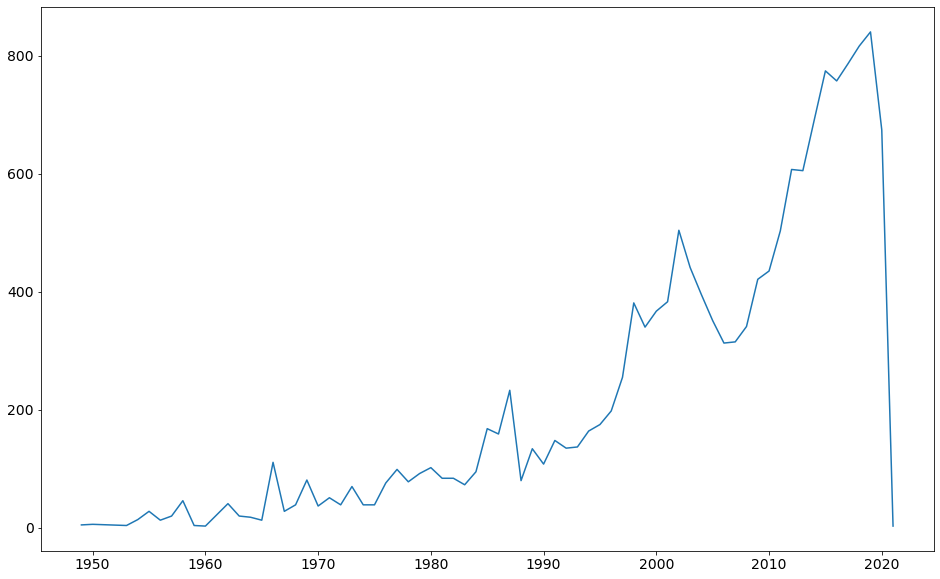

In [57]:
# 년도별 출시 세트수 꺾은선 그래프로 나타내기
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(sets_by_year.index, sets_by_year)    # 만약 groupby를 사용했다면, plt.plot(sets_by_year.index, sets_by_year.set_num)

- 만약 해당 2년을 제외 하지 않으면 위와 같이 차트 끝에 극적인 하락이 보여진다. 레고에 큰 문제라도 난 것 처럼 오해의 소지가 있다.
- 또한 2021년 데이터 셋에 모든 달이 들어가지 않았다는 점을 고려할 때, 더 나은 그림을 출력하려면 2020년, 2021년의 컬럼을 제외시키는 것이 최선이겠다.

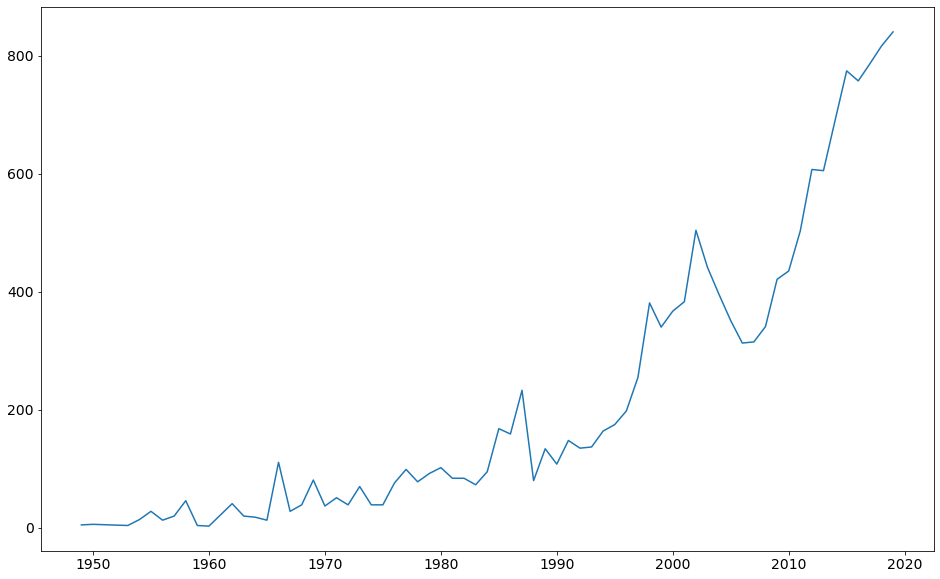

In [58]:
# 2020년 후반 데이터 삭제 후 다시 그래프 그리기
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(sets_by_year.index[:-2], sets_by_year[:-2])     #  # 만약 groupby를 사용했다면, plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

- 레고는 처음 45여 년간 제공하는 제품을 꾸준히 증가시켰지만, 실제로 회사에서 생상한 세트 수가 급격히 증가한 것은 1990년대 중반 이었다. 
- 또한 차트에서 2000년대 초반에 잠시 하락했고, 2005년경 강한 회복을 보여주다. 2008년도 글로벌 금융 위기로 다시 하락한다. 
- 그러다 2010년 경에 폭발적인 회복세를 보여주는 양상을 보인다.